## Keras: A high level neural network library

The number of neural network toolboxes has greatly increased with their popularity. Two of the leading packages for specifying neural network functions are Theano and Tensorflow, the latter of which is also a general purpose tensor computation library. However, it is sometimes overkill and inefficient to use a lower level language (compare writing your own SVM function using numpy and scipy rather than just loading scikit learn). For those more interested in applying neural networks (rather than developing them), Keras (keras.io) is a powerful library that runs on top of either Theano or Tensorflow. That is, it uses a Theano or Tensorflow engine, and has a number of precompiled layers and architectures, making it easy to construct a network. It is actively being developed to rapidly implement common neural network architectures.



## Installing Keras

Keras doesn't come installed along with Anaconda, but it can be installed using its package manager conda. 

On Mac machines you can simply type the following into a terminal, and on Windows installations you can find the program called "Anaconda prompt":

\>> conda install keras

OR

\>> pip install keras

Finally, you need to install either Tensorflow or Theano, as Keras uses either of these as a backend. It defaults to Tensorflow so we will use that. You can follow the same instructions as above to install TensorFlow, typing the following into a terminal:

\>> pip install tensorflow


## Configuring Keras 

As mentioned before, keras runs "on top of" tensorflow or theano. In case you want to use Theano, read on.

To run with Theano (on windows machine 32 bit machines or python 2.7 where you can't install tensorflow ) do the following: 

Locate the keras configuration file (usually at ~/.keras/keras.json or /Users/USERNAME/.keras/keras.json)

Change the "backend": field to "theano"

To start the demo, let's create a 2D dataset so we can visualize what the network is doing.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

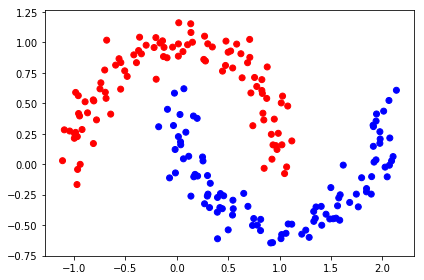

In [2]:
from sklearn.datasets import make_moons

# We generate a fake toy dataset to demonstrate our classifier:
from matplotlib.colors import ListedColormap

X, y = make_moons(n_samples=200, noise=0.1, random_state=23)

# For consistent color plotting:
colors = ('red', 'blue', 'green', 'gray', 'cyan', 'black', 'purple')
cmap = ListedColormap(colors[:len(np.unique(y))])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

And split it into a training and testing set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We'll use Keras to create a 2 hidden layer neural network, specifying the layer sizes below. Recall that our input is 2-D and output has 2 possible classes, so the neural network will have an input layer of 2, then a hidden layer of 10, a hidden layer of 5 and an output layer of 2 (sometimes referred to as a "readout" layer)

In [4]:
# specify the layer sizes: 
layer_sizes = [X_train.shape[1], 10, 5, np.unique(y_train).shape[0]]  # 2 hidden layers of size 10 and 5, respectively

Most neural networks fall under the "Sequential" class, where we specify the layers one by one and "add" them to the sequence. Let's add our layers below:

In [5]:
from keras.models import Sequential
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
# We will go over specific activation functions throughout the class.

from keras.optimizers import SGD
# SGD is the learning algorithm we will use

def build_model():
    model = Sequential()
    
    # Now that we have the model, let's add some layers:
    # First a fully-connected (Dense) hidden layer with appropriate input
    # dimension, 10 outputs, and ReLU activation
    model.add(Dense(
        input_dim=layer_sizes[0], 
        units=layer_sizes[1],
        activation="relu"
    ))

    # Now our second hidden layer with 10 inputs (from the first
    # hidden layer) and 5 outputs. Also with ReLU activation
    model.add(Dense(
        input_dim=layer_sizes[1], 
        units=layer_sizes[2],
        activation="relu"
    ))

    # Finally, add a readout layer, mapping the 5 hidden units
    # to two output units using the softmax function
    model.add(Dense(units=layer_sizes[3], 
                    kernel_initializer='uniform',
                    activation="softmax"))
    
    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])  
    # we'll have the categorical crossentropy as the loss function
    # we also want the model to automatically calculate accuracy
    return model

Using TensorFlow backend.


Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the error function as "categorical_crossentropy". 

In [6]:
model = build_model()

Instead of having class labels (like in scikit learn classifiers), the most straightforward approach to classification is to have an output unit correspond to each class. We have two classes, so we will map them to our two output units. class 1 will be [1, 0], and class 2 will be [0, 1]. Keras developers have thought ahead and included this in their utilities.

In [7]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [8]:
y_train.shape, y_train_vectorized.shape

((160,), (160, 2))

We can train our compiled model by calling .fit(). Recall that for stochastic gradient descent, we typically operate in small batches (in this case n=50) and over many iterations. 

In [9]:
model.fit(X_train, y_train_vectorized, epochs=10, batch_size=50, verbose = 1)

Epoch 1/10
160/160 [==============================] - 0s 2ms/step - loss: 0.6906 - acc: 0.6500
Epoch 2/10
160/160 [==============================] - 0s 55us/step - loss: 0.6903 - acc: 0.6438
Epoch 3/10
160/160 [==============================] - 0s 80us/step - loss: 0.6899 - acc: 0.6562
Epoch 4/10
160/160 [==============================] - 0s 108us/step - loss: 0.6892 - acc: 0.6625
Epoch 5/10
160/160 [==============================] - 0s 114us/step - loss: 0.6885 - acc: 0.6500
Epoch 6/10
160/160 [==============================] - 0s 69us/step - loss: 0.6876 - acc: 0.6500
Epoch 7/10
160/160 [==============================] - 0s 149us/step - loss: 0.6868 - acc: 0.6375
Epoch 8/10
160/160 [==============================] - 0s 126us/step - loss: 0.6859 - acc: 0.6438
Epoch 9/10
160/160 [==============================] - 0s 113us/step - loss: 0.6850 - acc: 0.6500
Epoch 10/10
160/160 [==============================] - 0s 76us/step - loss: 0.6841 - acc: 0.6563


At this point, the Keras model behaves a lot like a scikit-learn classifier (by design). It has a predict_proba function as well as a predict_classes function.

In [10]:
proba = model.predict_proba(X_test, batch_size=32)
classes = np.argmax(proba, axis=1)
# Print the accuracy:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, classes)

0.7

It doesn't seem to be performing that great. But we created the data in 2D so we can visualize what's going on. We plot the decision regions below.

In [11]:
# set up plotting grid
xx1, xx2 = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), 0.05), 
                       np.arange(X[:,1].min(), X[:,1].max(), 0.05))
grid = np.array([xx1.ravel(), xx2.ravel()]).T
Z = model.predict_classes(grid)
Z = np.array(Z)
Z = 1-Z.reshape(xx1.shape)  # for display purposes

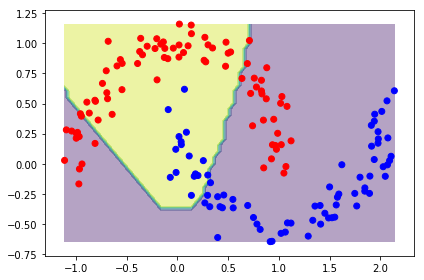

In [12]:
# Decision boundary drawn on training set
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_train[:,0], X_train[:,1], 
            c=y_train, cmap = cmap)

plt.tight_layout()
plt.show()

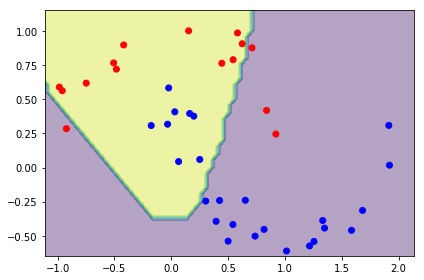

In [13]:
# Decision boundary drawn on test set

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_test, cmap = cmap)

plt.tight_layout()
plt.show()

But recall that we didn't specify that many epochs to run in the last model. That is, the model didn't have enough time to find the correct minimum. Let's let it run a little longer. Additionally, Keras models can be trained incrementally, such that if I call .fit() on our model object again, it will start off from where it left off. 

In [14]:
model.fit(X_train, y_train_vectorized, epochs=1000, batch_size=50, verbose=0)  # turn off the output
Z = model.predict_classes(grid)
Z = np.array(Z)
Z = 1-Z.reshape(xx1.shape)
accuracy_score(y_test, model.predict_classes(X_test))

0.85

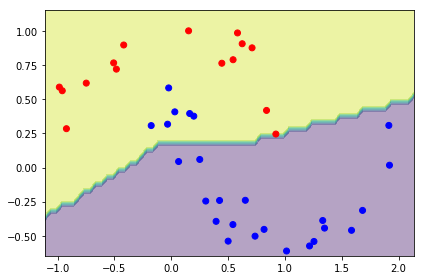

In [15]:
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_test, cmap = cmap)

plt.tight_layout()
plt.show()

1.0


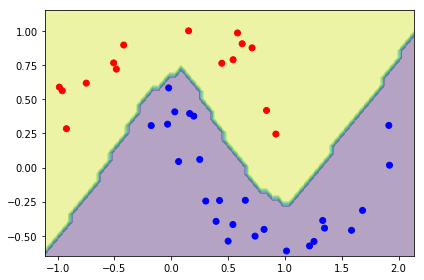

In [16]:
# Let's do it again just to see how far it'll go: 
model.fit(X_train, y_train_vectorized, epochs=5000, batch_size=50, verbose = 0)
Z = model.predict_classes(grid)
Z = np.array(Z)
Z = 1-Z.reshape(xx1.shape)
print(accuracy_score(y_test, model.predict_classes(X_test)))

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_test, cmap = cmap)

plt.tight_layout()
plt.show()

We did it! Now let's compare that to a RBF SVM, one of the "state of the art" classifiers before deep learning saw its resurgence.

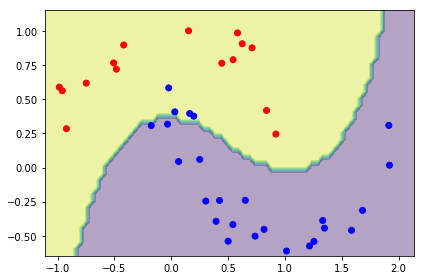

0.9


In [17]:
from sklearn import svm
svm = svm.SVC(kernel='rbf', C=1.0)

svm.fit(X_train, y_train)
Z = svm.predict(grid)
Z = np.array(Z)
Z = 1-Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_test, cmap = cmap)

plt.tight_layout()
plt.show()
print(svm.score(X_test, y_test))

You might have noticed that training a neural network is not trivial-- running more and more epochs might have taken a significant amount of time. (Imagine what it's like when scaled up to a real big data problem) Fortunately, neural network libraries support batch training (in which only parts of the dataset are loaded at once) and saving functions (sometimes referred to as checkpoints).

It's easy to save and load a model in Keras.


In [ ]:
from keras.models import load_model

model.save("model.h5")  # by default, the save() method writes to a HDF5 file.

del model
# to reload the model:
model = load_model("model.h5")

For reference, Keras now also interfaces nicely with scikit-learn. 

In [35]:
# https://keras.io/scikit-learn-api/
# construct, compile and return a Keras model
from keras.wrappers.scikit_learn import KerasClassifier

skmodel = KerasClassifier(build_fn=build_model, epochs=150, batch_size=50, verbose=1)


In [36]:
skmodel.fit(X_train, y_train)  # following scikit-learn function calls

In [37]:
skmodel.score(X_test, y_test)  # following scikit-learn function calls

0.7250000238418579